In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import torch

In [3]:
PATH='ivr_data/rossmann/'

In [4]:
train_df = pd.read_feather(f'{PATH}joined')
test_df = pd.read_feather(f'{PATH}joined_test')

In [31]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [5]:
len(train_df),len(test_df)

(844338, 41088)

In [32]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [6]:
import sys
sys.path.append("/mnt/azmnt/code/Users/bho829/fastai")
# sys.path.append("/mnt/azmnt/code/Users/bho829/fastai/fastai")

In [7]:
from fastai.tabular import *

In [8]:
procs=[FillMissing, Categorify, Normalize]

In [9]:
vec_vars = []
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [10]:
len(cat_vars)

22

In [11]:
len(cont_vars)

16

In [12]:
dep_var = 'Sales'
df = train_df[vec_vars + cat_vars + cont_vars + [dep_var,'Date']].copy()

In [13]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [14]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [15]:
train_df.shape

(844338, 93)

In [16]:
test_df.shape

(41088, 92)

In [17]:
valid_idx = range(cut)

In [18]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [19]:
from fastai.tabular.data import *

In [20]:
path = PATH

In [21]:
from fastai.data_block import FloatList

In [22]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [28]:
# type(data)

In [29]:
# data.x

In [30]:
# from fastai.gen_doc.nbdoc import doc

# doc(FloatList)

In [23]:
from fastai.torch_core import *

In [24]:

max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [25]:
from fastai.tabular.learner import tabular_learner

In [26]:
from fastai.metrics import exp_rmspe

In [36]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)


In [37]:
# learn.data.train_dl

In [38]:
# for i, dl in enumerate(learn.data.train_dl):
#     if i > 0:
#         break
#     print('i={}'.format(i))
#     print(dl)


In [39]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_runn

In [40]:
len(data.train_ds.cont_names)

16

In [41]:
learn.lr_find()

epoch,train_loss,valid_loss,exp_rmspe,time


epoch 0
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


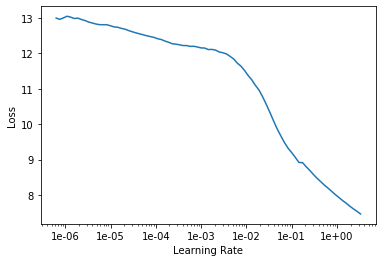

In [29]:
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.025476,0.022627,0.157416,06:14
1,0.018477,0.017106,0.131262,06:20
2,0.017720,0.015495,0.119514,07:35
3,0.013981,0.013021,0.109159,10:15
4,0.010250,0.011545,0.105813,13:24


In [56]:
learn.save('1')

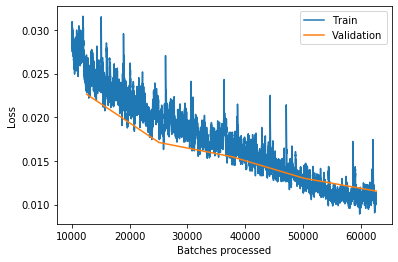

In [57]:
learn.recorder.plot_losses(skip_start=10000)

In [58]:
learn.load('1');

In [ ]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.012393,0.016367,0.116766,13:39
